### import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(r"/kaggle/input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv")
df.shape

(630, 9)

In [4]:
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [5]:
df.tail()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
629,73.920,21.392,93.392,11.392,91.392,91.96,4.088,63.48,2


In [6]:
df.sample(5)

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
514,46.480,16.592,96.888,5.184,95.592,65.92,7.592,51.48,0
383,48.080,17.232,97.848,6.464,96.232,72.32,8.232,53.08,0
349,97.440,27.440,86.800,17.720,84.160,101.80,0.000,78.60,4
355,75.840,21.584,93.584,11.584,91.584,92.92,4.376,63.96,2
620,97.024,27.024,86.280,17.512,83.536,101.28,0.000,77.56,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


* **'sr' or 'snoring_rate'**: The rate or intensity of snoring during sleep, which could be measured in some unit or scale.
* **'rr' or 'respiration_rate'**: The number of breaths taken per minute during sleep.
* **'t' or 'body_temperature'**: The body temperature of the user during sleep, possibly measured in degrees Celsius or Fahrenheit.
* **'lm' or 'limb_movement'**: The rate or intensity of limb movement during sleep, indicating how active or restless the person is.
* **'bo' or 'blood_oxygen'**: The blood oxygen level, which represents the amount of oxygen present in the blood during sleep.
* **'rem' or 'eye_movement'**: The eye movement activity during sleep, which might indicate the Rapid Eye Movement (REM) phase of sleep.
* **'sr.1' or 'sleeping_hours'**: The number of hours slept during a particular sleep session.
* **'hr' or 'heart_rate'**: The number of heartbeats per minute during sleep, an essential physiological parameter related to overall health and sleep quality.
* **'sl' or 'stress_level'**: The target variable representing the stress level during sleep, categorized into

In [8]:
df.describe()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [9]:
df.isna().sum()

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.rename(columns={'sr': 'snoring rate', 'rr':'respiration rate', 't': 'body temperature', 'lm':'limb movement',
                            'bo':'blood oxygen', 'rem':'eye movement', 'sr.1':'sleeping hours', 'hr':'heart rate',
                            'sl':'stress level'}, inplace=True)
df.columns

Index(['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate',
       'stress level'],
      dtype='object')

<Axes: xlabel='stress level', ylabel='count'>

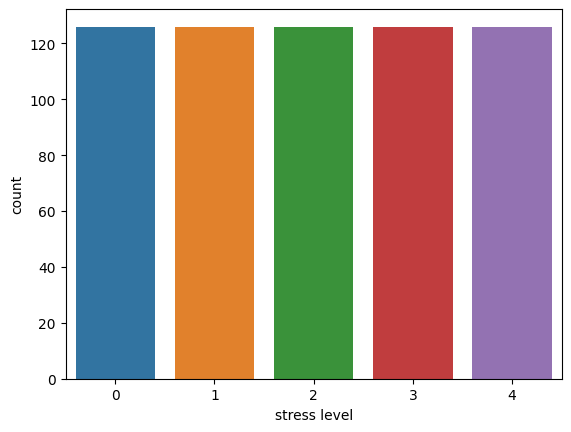

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='stress level', data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

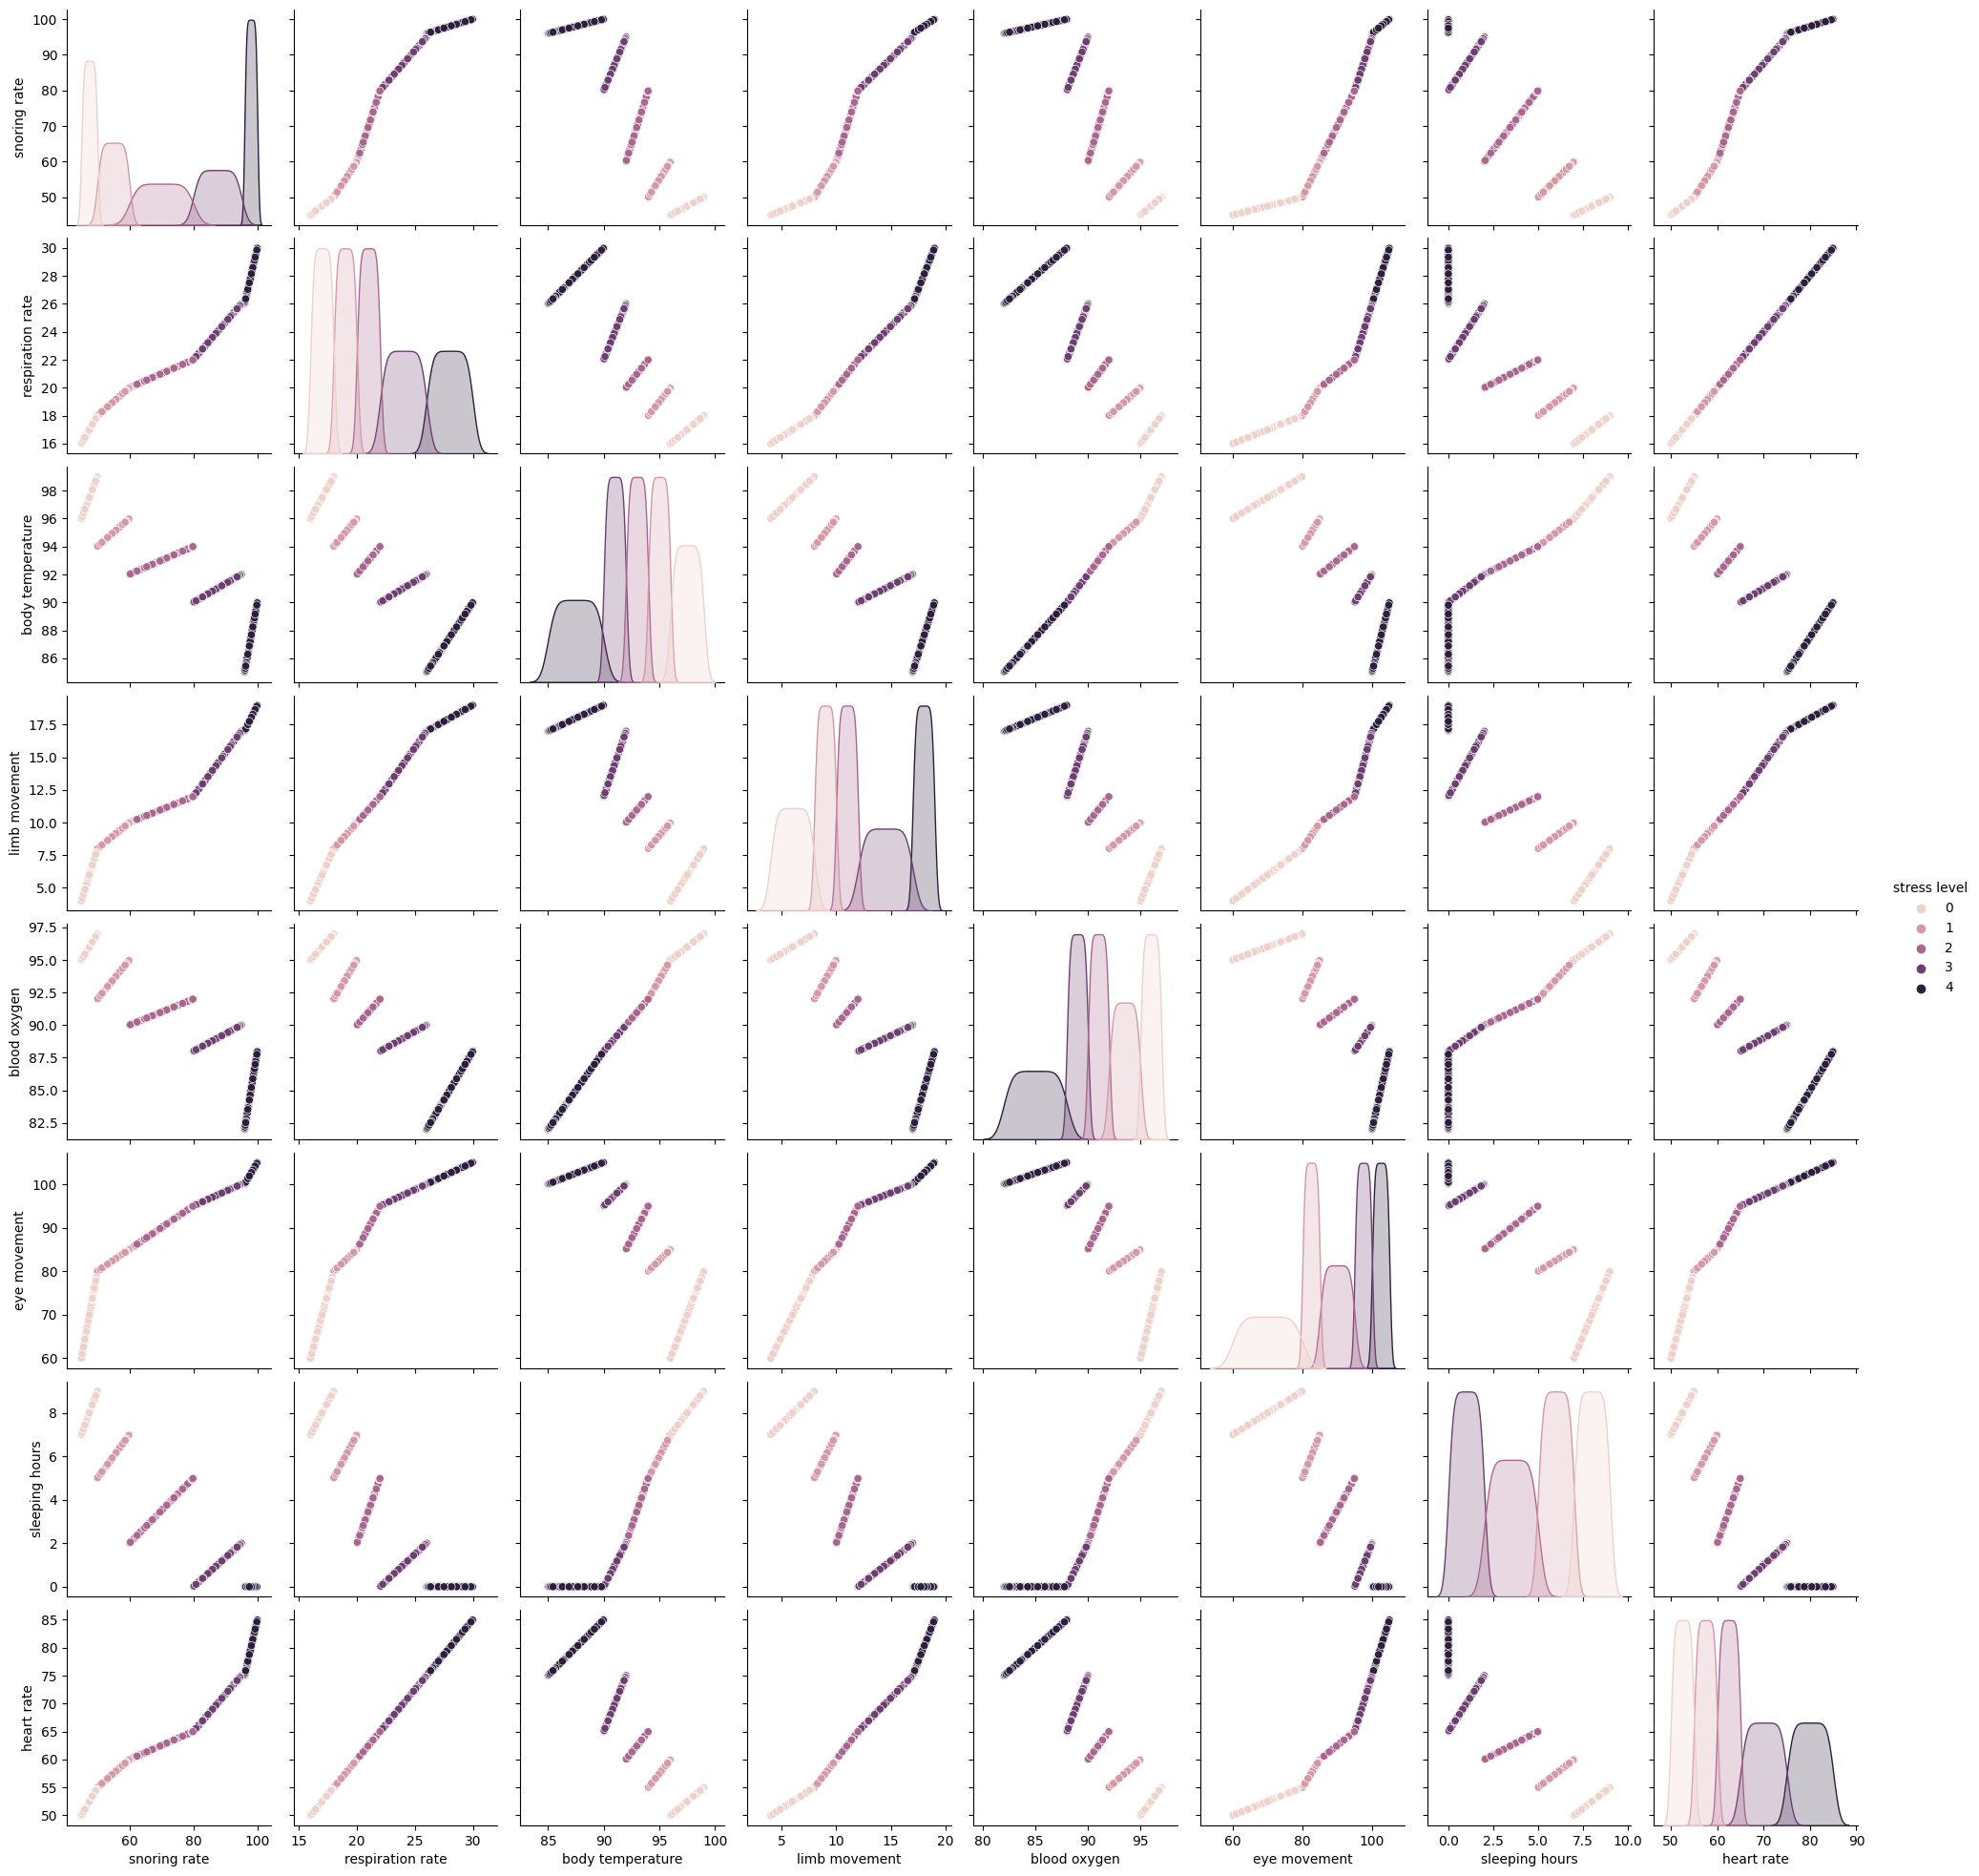

In [13]:
sns.pairplot(df, hue='stress level')

<Axes: >

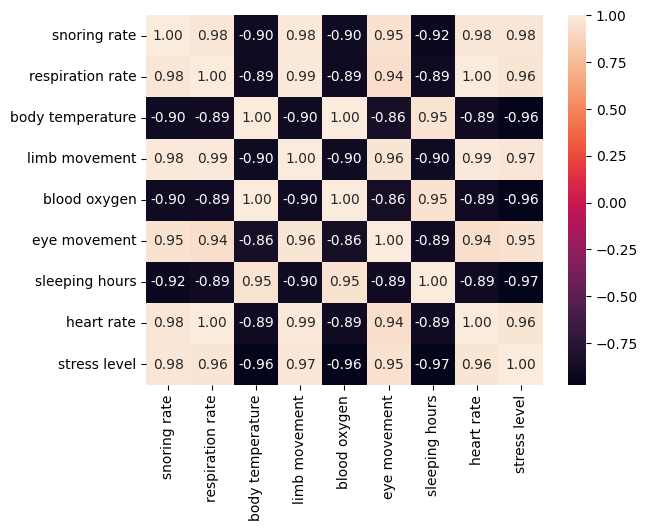

In [14]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

X = df.drop(['stress level'], axis=1)
y = df['stress level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGB Classifier" :XGBClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Ada Boost Classifier": AdaBoostClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)

    print(f"{name}:")
    print("Accuracy Score: ",accuracy_score(y_test,y_pred))
    print()

Logistic Regression:
Accuracy Score:  1.0

Decision Tree:
Accuracy Score:  0.9788359788359788

Gradient Boosting Classifier:
Accuracy Score:  0.9788359788359788

XGB Classifier:
Accuracy Score:  0.9841269841269841

K-Nearest Neighbors:
Accuracy Score:  1.0

Random Forest Classifier:
Accuracy Score:  0.9894179894179894

Ada Boost Classifier:
Accuracy Score:  0.582010582010582

